# Database Sanitation

__Programmers:__
- Sharon Lutati
- Guy Erez
 
__Project Description:__

The problem of association rule hiding can be describe as: 
Transform the original database such that data mining techniques will results only non
 sensitive rules and all sensitive rules must not mined from transformed database. 
This transformed database is known as __sanitized database.__

__Database Used:__

adult.data database, reference [here](https://archive.ics.uci.edu/ml/datasets/adult).

**Prediction task** is to determine whether a person makes over or under 50K a year.

_**Meaning:** For the purposes of our project, we will consider any association rule where : X ⇒ Salary_
Salary is the group {'<=50K' , '>50K'}.

*Sensitive rule we will want to remove would be rules that include sex or race.*

In [ ]:
from Objects.Database import Database
from Algorithms.MDSRRC import MDSRRC
from Algorithms.DSRRC import DSRRC
from Utilities.Utilities import *
import copy
from Utilities.histogram import *


database = Database("Original Database/adult.csv")
database.df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>workclass</th>
      <th>fnlwgt</th>
      <th>education</th>
      <th>education-num</th>
      <th>marital-status</th>
      <th>occupation</th>
      <th>relationship</th>
      <th>race</th>
      <th>sex</th>
      <th>capital-gain</th>
      <th>capital-loss</th>
      <th>hours-per-week</th>
      <th>native-country</th>
      <th>salary</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>50</td>
      <td>Self-emp-not-inc</td>
      <td>83311</td>
      <td>Bachelors</td>
      <td>13</td>
      <td>Married-civ-spouse</td>
      <td>Exec-managerial</td>
      <td>Husband</td>
      <td>White</td>
      <td>Male</td>
      <td>0</td>
      <td>0</td>
      <td>13</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>1</th>
      <td>38</td>
      <td>Private</td>
      <td>215646</td>
      <td>HS-grad</td>
      <td>9</td>
      <td>Divorced</td>
      <td>Handlers-cleaners</td>
      <td>Not-in-family</td>
      <td>White</td>
      <td>Male</td>
      <td>0</td>
      <td>0</td>
      <td>40</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>2</th>
      <td>53</td>
      <td>Private</td>
      <td>234721</td>
      <td>11th</td>
      <td>7</td>
      <td>Married-civ-spouse</td>
      <td>Handlers-cleaners</td>
      <td>Husband</td>
      <td>Black</td>
      <td>Male</td>
      <td>0</td>
      <td>0</td>
      <td>40</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>3</th>
      <td>28</td>
      <td>Private</td>
      <td>338409</td>
      <td>Bachelors</td>
      <td>13</td>
      <td>Married-civ-spouse</td>
      <td>Prof-specialty</td>
      <td>Wife</td>
      <td>Black</td>
      <td>Female</td>
      <td>0</td>
      <td>0</td>
      <td>40</td>
      <td>Cuba</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>4</th>
      <td>37</td>
      <td>Private</td>
      <td>284582</td>
      <td>Masters</td>
      <td>14</td>
      <td>Married-civ-spouse</td>
      <td>Exec-managerial</td>
      <td>Wife</td>
      <td>White</td>
      <td>Female</td>
      <td>0</td>
      <td>0</td>
      <td>40</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
  </tbody>
</table>
</div>

In [2]:
columns_to_remove = ['capital-gain', 'capital-loss', 'fnlwgt', 'education-num']
database.omit_columns(columns_to_remove)
columns_to_unify = ['age', 'hours-per-week']
margin = [5, 10]
database.unification(columns_to_unify, margin)
database.df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>workclass</th>
      <th>education</th>
      <th>marital-status</th>
      <th>occupation</th>
      <th>relationship</th>
      <th>race</th>
      <th>sex</th>
      <th>hours-per-week</th>
      <th>native-country</th>
      <th>salary</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>47-52</td>
      <td>Self-emp-not-inc</td>
      <td>Bachelors</td>
      <td>Married-civ-spouse</td>
      <td>Exec-managerial</td>
      <td>Husband</td>
      <td>White</td>
      <td>Male</td>
      <td>11-21</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>1</th>
      <td>37-42</td>
      <td>Private</td>
      <td>HS-grad</td>
      <td>Divorced</td>
      <td>Handlers-cleaners</td>
      <td>Not-in-family</td>
      <td>White</td>
      <td>Male</td>
      <td>31-41</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52-57</td>
      <td>Private</td>
      <td>11th</td>
      <td>Married-civ-spouse</td>
      <td>Handlers-cleaners</td>
      <td>Husband</td>
      <td>Black</td>
      <td>Male</td>
      <td>31-41</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>3</th>
      <td>27-32</td>
      <td>Private</td>
      <td>Bachelors</td>
      <td>Married-civ-spouse</td>
      <td>Prof-specialty</td>
      <td>Wife</td>
      <td>Black</td>
      <td>Female</td>
      <td>31-41</td>
      <td>Cuba</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>4</th>
      <td>37-42</td>
      <td>Private</td>
      <td>Masters</td>
      <td>Married-civ-spouse</td>
      <td>Exec-managerial</td>
      <td>Wife</td>
      <td>White</td>
      <td>Female</td>
      <td>31-41</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
  </tbody>
</table>
</div>

we used the mlxtend library to mine [association rules](https://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/association_rules/) from our database, using the [apriori algorithm](http://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/apriori/) from the library.

_reminder:_
Let I={i1,…,im} be a set of items. 
Database D={T1,⋯,Tn} is a set of transactions, where Ti⊆I(1≤i≤m). 

Each transaction T is an itemset such that T⊆I.
A transaction T supports X, a set of items in I, if X⊆I. 

The association rule is an implication formula like X⇒Y, where X⊂I,Y⊂I and X∩Y=∅.

The rule X⇒Y with support s and confidence c is called, 
 
𝐈𝐅 (|𝑿∪𝒀|)/(|𝑫|)≥𝑺    𝑨𝑵𝑫     (|𝑿∪𝒀|)/(|𝑿|)≥𝑪

Because of interestingness, we consider user specified thresholds for support and confidence, 
_MST (minimum support threshold)_ and _MCT (minimum confidence threshold)_. 

In [3]:
from Utilities.Utilities import *
minimum_support_threshold = 0.5
minimum_confidence_threshold = 0.5
all_rules = all_rules_generator(database,minimum_support_threshold, minimum_confidence_threshold)
all_rules

[{'lhs': {' Private'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' Private'}},
 {'lhs': {' United-States'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' United-States'}},
 {'lhs': {' White'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' White'}},
 {'lhs': {' United-States'}, 'rhs': {' Male'}},
 {'lhs': {' Male'}, 'rhs': {' United-States'}},
 {'lhs': {' Male'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' Male'}},
 {'lhs': {' Private'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States'}, 'rhs': {' Private'}},
 {'lhs': {' Private'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' Private'}},
 {'lhs': {' United-States'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States', ' White'}, 'rhs': {' <=50K'}},
 {'lhs': {' United-States', ' <=50K'}, 'rhs': {' White'}},
 {'lhs': {' White', ' <=50K'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States'}, 'rhs': {' White', ' <=50K'}},
 {'lhs': {' White'}, 'rhs': {' Unite

In [4]:
sensitive_rules = sensitive_rules_generator(database, minimum_support_threshold, minimum_confidence_threshold,{'sex', 'race'})
sensitive_rules

[{'lhs': {' White'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' White'}},
 {'lhs': {' United-States'}, 'rhs': {' Male'}},
 {'lhs': {' Male'}, 'rhs': {' United-States'}},
 {'lhs': {' Male'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' Male'}},
 {'lhs': {' Private'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' Private'}},
 {'lhs': {' United-States'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States', ' White'}, 'rhs': {' <=50K'}},
 {'lhs': {' United-States', ' <=50K'}, 'rhs': {' White'}},
 {'lhs': {' White', ' <=50K'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States'}, 'rhs': {' White', ' <=50K'}},
 {'lhs': {' White'}, 'rhs': {' United-States', ' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' United-States', ' White'}},
 {'lhs': {' United-States', ' Male'}, 'rhs': {' White'}},
 {'lhs': {' United-States', ' White'}, 'rhs': {' Male'}},
 {'lhs': {' Male', ' White'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States'}, '

In [5]:
reduced_sensetive_rules=association_rule_reduction(sensitive_rules,set(),{' <=50K'})
reduced_sensetive_rules

[{'lhs': {' White'}, 'rhs': {' <=50K'}},
 {'lhs': {' United-States', ' White'}, 'rhs': {' <=50K'}},
 {'lhs': {' United-States'}, 'rhs': {' White', ' <=50K'}},
 {'lhs': {' White'}, 'rhs': {' United-States', ' <=50K'}}]

__Algorithms Implemented:__
- DSRRC
    - Reference:  [DSRRC Algorithm](https://ieeexplore.ieee.org/abstract/document/5592589)
- MDRSRRC
    - Reference: [MDSRRC Algorithm](https://ieeexplore.ieee.org/document/6514417)
    

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Images and Histograms\dsrrc_image.png")

<img src="Images and Histograms\dsrrc_image.png"/>

In [7]:
Image(url= "Images and Histograms\mdsrrc_image.png")

<img src="Images and Histograms\mdsrrc_image.png"/>

In [8]:
dsrrc_possible_rules=sensitive_rules_with_single_rhs_lhs(sensitive_rules)
dsrrc_possible_rules

[{'lhs': {' White'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' White'}},
 {'lhs': {' United-States'}, 'rhs': {' Male'}},
 {'lhs': {' Male'}, 'rhs': {' United-States'}},
 {'lhs': {' Male'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' Male'}},
 {'lhs': {' Private'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' Private'}},
 {'lhs': {' United-States'}, 'rhs': {' White'}},
 {'lhs': {' White'}, 'rhs': {' United-States'}}]

In [10]:
d1=copy.deepcopy(database)
d2=copy.deepcopy(database)
dpr_copy=copy.deepcopy(dsrrc_possible_rules)
database_size=database.df.size
dsrrc_db = DSRRC(d1, minimum_support_threshold, minimum_confidence_threshold, dsrrc_possible_rules)

IndexError: pop from empty list

In [11]:
dsrrc_db.df.tail(20)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>workclass</th>
      <th>education</th>
      <th>marital-status</th>
      <th>occupation</th>
      <th>relationship</th>
      <th>race</th>
      <th>sex</th>
      <th>hours-per-week</th>
      <th>native-country</th>
      <th>salary</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>32540</th>
      <td>37-42</td>
      <td>?</td>
      <td>HS-grad</td>
      <td>Separated</td>
      <td>?</td>
      <td>Not-in-family</td>
      <td>Black</td>
      <td>Female</td>
      <td>31-41</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32541</th>
      <td>72-77</td>
      <td>?</td>
      <td>HS-grad</td>
      <td>Married-civ-spouse</td>
      <td>?</td>
      <td>Husband</td>
      <td>???</td>
      <td>???</td>
      <td>21-31</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32542</th>
      <td>42-47</td>
      <td>Local-gov</td>
      <td>Assoc-acdm</td>
      <td>Divorced</td>
      <td>Prof-specialty</td>
      <td>Unmarried</td>
      <td>???</td>
      <td>Female</td>
      <td>41-51</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32543</th>
      <td>27-32</td>
      <td>Private</td>
      <td>Masters</td>
      <td>Divorced</td>
      <td>Other-service</td>
      <td>Not-in-family</td>
      <td>Other</td>
      <td>Female</td>
      <td>21-31</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32544</th>
      <td>37-42</td>
      <td>Local-gov</td>
      <td>Assoc-acdm</td>
      <td>Married-civ-spouse</td>
      <td>Adm-clerical</td>
      <td>Wife</td>
      <td>???</td>
      <td>Female</td>
      <td>11-21</td>
      <td>United-States</td>
      <td>&gt;50K</td>
    </tr>
    <tr>
      <th>32545</th>
      <td>37-42</td>
      <td>Private</td>
      <td>Assoc-acdm</td>
      <td>Divorced</td>
      <td>Tech-support</td>
      <td>Not-in-family</td>
      <td>???</td>
      <td>Female</td>
      <td>31-41</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32546</th>
      <td>42-47</td>
      <td>Private</td>
      <td>HS-grad</td>
      <td>Married-civ-spouse</td>
      <td>Machine-op-inspct</td>
      <td>Husband</td>
      <td>???</td>
      <td>???</td>
      <td>31-41</td>
      <td>Mexico</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32547</th>
      <td>62-67</td>
      <td>Self-emp-not-inc</td>
      <td>Prof-school</td>
      <td>Never-married</td>
      <td>Prof-specialty</td>
      <td>Not-in-family</td>
      <td>???</td>
      <td>???</td>
      <td>61-71</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32548</th>
      <td>42-47</td>
      <td>State-gov</td>
      <td>Some-college</td>
      <td>Divorced</td>
      <td>Adm-clerical</td>
      <td>Other-relative</td>
      <td>???</td>
      <td>Female</td>
      <td>31-41</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32549</th>
      <td>42-47</td>
      <td>Self-emp-not-inc</td>
      <td>Some-college</td>
      <td>Married-civ-spouse</td>
      <td>Craft-repair</td>
      <td>Husband</td>
      <td>???</td>
      <td>???</td>
      <td>41-51</td>
      <td>United-States</td>
      <td>&lt;=50K</td>
    </tr>
    <tr>
      <th>32550</th>
      <td>32-37</td>
      <td>Private</td>
      <td>10th</td>
      <td>Married-civ-spouse</td>
      <td>Handlers-cleaners</td>
      <td>Husband</td>
      <td>Amer-Indian-Eskimo</td>
      <td>???</td>
      <td>31-41</td>
      <td>United-States</td>
      <td>&lt;=50K</t

In [12]:
all_rules_dsrrc_db = all_rules_generator(dsrrc_db,minimum_support_threshold, minimum_confidence_threshold)
all_rules_dsrrc_db

[{'lhs': {' Private'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' Private'}},
 {'lhs': {' United-States'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' United-States'}},
 {'lhs': {' Private'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States'}, 'rhs': {' Private'}}]

In [14]:
mdsrrc_db = MDSRRC(d2, minimum_support_threshold, minimum_confidence_threshold, dpr_copy)

TypeError: sensitive_rules_generator() missing 1 required positional argument: 'sensetive_atrributes'

In [92]:
mdsrrc_db.df.tail(20)

age          workclass      education       marital-status  \
32540  37-42                  ?        HS-grad            Separated   
32541  72-77                  ?        HS-grad   Married-civ-spouse   
32542  42-47          Local-gov     Assoc-acdm             Divorced   
32543  27-32            Private        Masters             Divorced   
32544  37-42          Local-gov     Assoc-acdm   Married-civ-spouse   
32545  37-42            Private     Assoc-acdm             Divorced   
32546  42-47            Private        HS-grad   Married-civ-spouse   
32547  62-67   Self-emp-not-inc    Prof-school        Never-married   
32548  42-47          State-gov   Some-college             Divorced   
32549  42-47   Self-emp-not-inc   Some-college   Married-civ-spouse   
32550  32-37            Private           10th   Married-civ-spouse   
32551  42-47            Private      Assoc-voc   Married-civ-spouse   
32552  32-37            Private        Masters        Never-married   
32553  52-57            Private        Masters   Married-civ-spouse   
32554  22-27            Private   Some-college        Never-married   
32555  27-32            Private     Assoc-acdm   Married-civ-spouse   
32556  37-42            Private        HS-grad   Married-civ-spouse   
32557  57-62            Private        HS-grad              Widowed   
32558  22-27            Private        HS-grad        Never-married   
32559  52-57       Self-emp-inc        HS-grad   Married-civ-spouse   

               occupation     relationship                 race      sex  \
32540                   ?    Not-in-family                Black   Female   
32541                   ?          Husband                White     Male   
32542      Prof-specialty        Unmarried                White   Female   
32543       Other-service    Not-in-family                Other   Female   
32544        Adm-clerical             Wife                White   Female   
32545        Tech-support    Not-in-family                White   Female   
32546   Machine-op-inspct          Husband                White     Male   
32547      Prof-specialty    Not-in-family                White     Male   
32548        Adm-clerical   Other-relative                White   Female   
32549        Craft-repair          Husband                White     Male   
32550   Handlers-cleaners          Husband   Amer-Indian-Eskimo     Male   
32551               Sales          Husband                White     Male   
32552        Tech-support    Not-in-family   Asian-Pac-Islander     Male   
32553     Exec-managerial          Husband                White     Male   
32554     Protective-serv    Not-in-family                White     Male   
32555        Tech-support             Wife                White   Female   
32556   Machine-op-inspct          Husband                White     Male   
32557        Adm-clerical        Unmarried                White   Female   
32558        Adm-clerical        Own-child                White     Male   
32559     Exec-managerial             Wife                White   Female   

      hours-per-week  native-country  salary  
32540          31-41   United-States   <=50K  
32541          21-31   United-States   <=50K  
32542          41-51   United-States   <=50K  
32543          21-31   United-States   <=50K  
32544          11-21   United-States    >50K  
32545          31-41   United-States   <=50K  
32546          31-41          Mexico   <=50K  
32547          61-71   United-States   <=50K  
32548          31-41   United-States   <=50K  
32549          41-51   United-States   <=50K  
32550          31-41   United-States   <=50K  
32551          41-51   United-States   <=50K  
32552          11-21          Taiwan   <=50K  
32553          31-41   United-States    >50K  
32554          31-41   United-States   <=50K  
32555          31-41   United-States   <=50K  
32556          31-41   United-States    >50K  
32557          31-41   United-States   <=50K  
32558          11-21   Unit

In [93]:
all_rules_mdsrrc_db = all_rules_generator(mdsrrc_db,minimum_support_threshold, minimum_confidence_threshold)
all_rules_mdsrrc_db

[{'lhs': {' Private'}, 'rhs': {' <=50K'}},
 {'lhs': {' <=50K'}, 'rhs': {' Private'}},
 {'lhs': {' <=50K'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States'}, 'rhs': {' <=50K'}},
 {'lhs': {' Private'}, 'rhs': {' United-States'}},
 {'lhs': {' United-States'}, 'rhs': {' Private'}}]

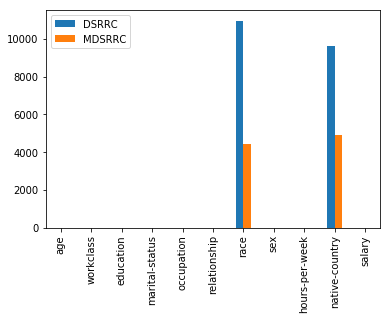

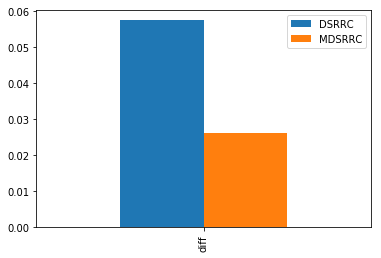

In [94]:
plt_col, plt_prec = dissimilarity(mdsrrc_db.df,dsrrc_db.df,database_size)

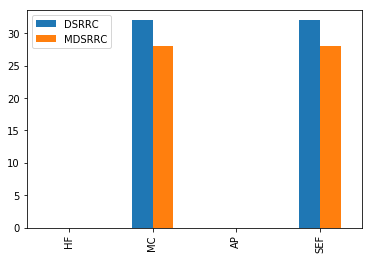

In [95]:
plt_sef = side_effect_factor(database,mdsrrc_db, dsrrc_db, minimum_support_threshold,minimum_confidence_threshold)